# Training a bigram model for text

In [1]:
# Download the dataset
# !wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

In [2]:
# read the input file
with open('input.txt', 'r') as file:
    data = file.read()

print("The length of the data is: ", len(data))

# print the first n characters
print(data[:300])
print("--------------------")
# print the last n characters
print(data[-300:])

The length of the data is:  1115394
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us
--------------------
 is a sleepy language and thou speak'st
Out of thy sleep. What is it thou didst say?
This is a strange repose, to be asleep
With eyes wide open; standing, speaking, moving,
And yet so fast asleep.

ANTONIO:
Noble Sebastian,
Thou let'st thy fortune sleep--die, rather; wink'st
Whiles thou art waking.



In [3]:
# get the unique characters in the dataset and sort them
chars = sorted(list(set(data)))
# print the unique characters in a concatenated string
print(f"Unique chars: {''.join(chars)} of length {len(chars)}")

# create a dictionary that maps each character to an index
char_to_index = {ch: i for i, ch in enumerate(chars)}
# create a dictionary that maps each index to a character
index_to_char = {i: ch for i, ch in enumerate(chars)}

# print the first 5 characters and their corresponding indices
for i in range(5):
    print(f"Index: {char_to_index[chars[i]]} | Char: {chars[i]} ")

Unique chars: 
 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz of length 65
Index: 0 | Char: 
 
Index: 1 | Char:   
Index: 2 | Char: ! 
Index: 3 | Char: $ 
Index: 4 | Char: & 


## What is a bigram model?

My understanding is that a bigram model maps a character to the probability of other characters occurring after that.

So if you have n characters, the you have an n by n matrix where the rows and columns represent a character, and when you have a character and you pluck out a row, it contains the probabilities of character corresponding to the column occuring after that.

### What would be a non-ML way of figuring this out?
- Start reading the data character by character. 
- For each character, look at the character next to it.
- Add a count for that next char in the array in the right cell
- At the end, simply divide the numbers by the total length of the dataset
- Voila - you should have the bigram

Let's try this out!

## Non ML way

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


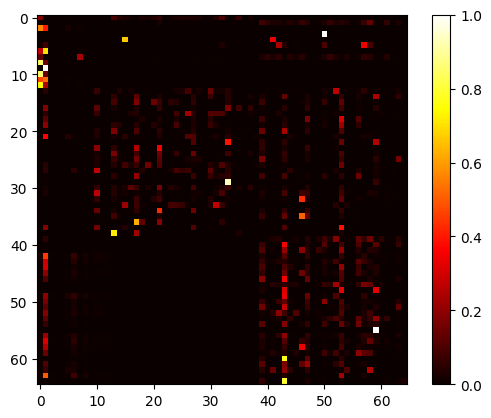

In [4]:
import numpy as zeros
import matplotlib.pyplot as plt

n = len(chars)
# initialize an np array of size n x n where n = the size of chars
bigram = zeros.zeros((n, n))

# loop through the data and update the bigram matrix
for i in range(len(data) - 1):
    bigram[char_to_index[data[i]], char_to_index[data[i + 1]]] += 1

# normalize the bigram matrix
bigram = bigram / bigram.sum(axis=1, keepdims=True)

# let's check that all the rows sum to 1
print(bigram.sum(axis=1))

# display the bigram in a plot
plt.imshow(bigram, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [5]:
# now we can generate text using the bigram model
import random
import numpy as np

# set the seed
random.seed(42)

# get the next character based on the probability distribution
def get_next_char(current_char):
    # get the index of the current character
    current_char_index = char_to_index[current_char]
    # get the probabilities of the next character
    next_char_probabilities = bigram[current_char_index]
    # get the next character
    next_char_index = np.random.choice(n, p=next_char_probabilities)
    next_char = index_to_char[next_char_index]
    return next_char

# pick an initial character at random
initial_char = random.choice(chars)

# set the length of the generated text
text_length = 300
output_string = initial_char
for _ in range(text_length):
    next_char = get_next_char(output_string[-1])
    output_string += next_char
    
print(output_string)


BENewerd tans me?
Kiamy r, bast ag,

Whifor,
Whert hidow wed; atre foul Indd weir hind ongs I:
Wilo y amican, bee omof msad
MPSearelllin haf,
Mend?
Be, er ierth.
Ay ck'sar bre vers m, astst mans nssamyof al t ccos! qunliedeasscke tis te!
CKivem. me we tond chomer t:
Whe, fre ot athorary t, athyoront.


## The ML way

I am not really sure what the ML way will be.

- Create a neural network that has the following layers
    - input
    - bigrame matrix
    - loss
- Initialize the weights at random
- Do the training loop
    - Forward pass
    - Gradient descent
- We somehow need to make sure that the weights in a row always add up to 1

torch.Size([1115393]) torch.Size([1115393])
Epoch: 0 | Loss: 4.735684871673584
Epoch: 10 | Loss: 4.5822649002075195
Epoch: 20 | Loss: 4.43464994430542
Epoch: 30 | Loss: 4.293544769287109
Epoch: 40 | Loss: 4.159358501434326
Epoch: 50 | Loss: 4.0323004722595215
Epoch: 60 | Loss: 3.9124417304992676
Epoch: 70 | Loss: 3.799764394760132
Epoch: 80 | Loss: 3.6941874027252197
Epoch: 90 | Loss: 3.5955801010131836


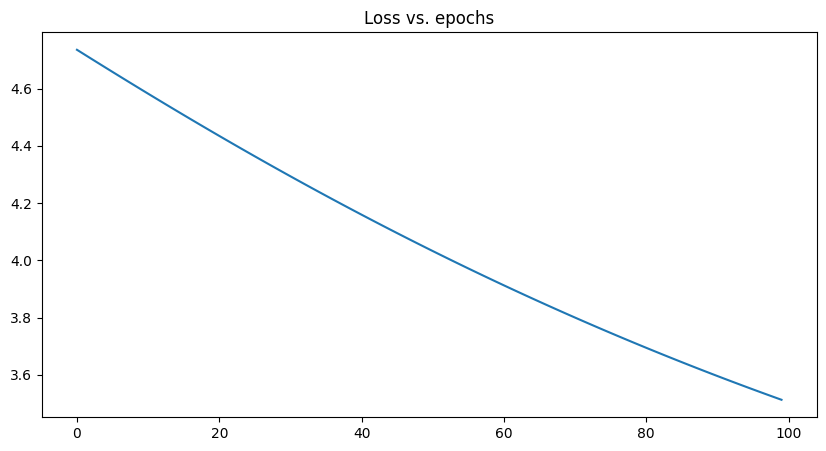

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# define the bigram class
class Bigram(nn.Module):
    def __init__(self, vocab_size):
        super(Bigram, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, vocab_size)

    def forward(self, x):
        return self.embeddings(x)
    
def train_bigram_basic(model, x, y, num_epochs, loss_fn, optimizer):
    losses = []

    for epoch in range(num_epochs):
        optimizer.zero_grad()

        # forward pass, don't call model.forward(x) directly
        y_pred = model(x) 

        # compute the loss
        # NOTE:~ this is an odd one... y_pred will return logits
        # see the forward function above... it will return embeddings
        # BUT since the loss function is CrossEntropyLoss, it will
        # automatically apply the softmax function to the logits
        # and return predicted values of y
        loss = loss_fn(y_pred, y)

        # backward pass - calculate gradients
        loss.backward()

        # update the weights
        optimizer.step()

        # append and print the loss
        losses.append(loss.item())
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss.item()}")

    return model, losses

# plot the loss
def plot_loss(losses):
    plt.figure(figsize=(10, 5))
    plt.plot(losses)
    plt.title('Loss vs. epochs')
    plt.show()

# convert the data to indices and tensors
x_indices = [char_to_index[ch] for ch in data[:-1]]
y_indices = [char_to_index[ch] for ch in data[1:]]
x = torch.tensor(x_indices, dtype=torch.long)
y = torch.tensor(y_indices, dtype=torch.long)

print(x.shape, y.shape)

epochs = 100
vocab_size = len(chars)
model = Bigram(vocab_size)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model, losses = train_bigram_basic(model, x, y, epochs, loss_fn, optimizer)
plot_loss(losses)

In [7]:
import torch.nn.functional as F

def predict_next_char(model, current_char):
    current_index = torch.tensor(char_to_index[initial_char], dtype=torch.long)

    # predict from the model
    y_pred = model(current_index)

    # y_pred will return embedding (logits) so we need to apply softmax
    probabilities = F.softmax(y_pred, dim=-1).squeeze(0)  # Shape: (vocab_size,)

    # Sample the next character index (use torch.multinomial for randomness)
    next_index = torch.multinomial(probabilities, num_samples=1).item()

    return index_to_char[next_index]


# generate text using the trained model
def gen_text(model, initial_char, text_length):
    output_string = initial_char
    for _ in range(text_length):
        next_char = predict_next_char(model, output_string[-1])
        output_string += next_char
    return output_string

initial_char = random.choice(chars)
text_length = 300
output_string = gen_text(model, initial_char, text_length)
print(output_string)

$gZ,TfWOxLaK'F:d,3n:bN3Tpls,,J ,L,aTqj!mglQdgA.iPjA,!,y-$OTL'FAKeKMROHNYURK,sp,DkqvVMfK,,,VP&,aG,JZXecd3omT 3gWTGq v;YHRRjo$sTuxYdT ,,TXvY-Fg&T$qGgnan-.,gTgr,fI,agj,,NMZgQ,XzJeL:z,MAzOfpY?bKPr!g,,Cf.JlL,SMDJ; Tvjp;bf;,T xT
gFvALTT&vd&u?pATfMLp:$eYTXkq,.:APYKCT,,D.AMgnLu,Mr.,RITReyHy-,nzsTzmMpaTlgA ,,


## The execution was slow. Try batching.

Epoch: 10 | Loss: 4.584294319152832
Epoch: 20 | Loss: 4.440248489379883
Epoch: 30 | Loss: 4.302271842956543
Epoch: 40 | Loss: 4.1706624031066895
Epoch: 50 | Loss: 4.0457987785339355
Epoch: 60 | Loss: 3.927858591079712
Epoch: 70 | Loss: 3.816840887069702
Epoch: 80 | Loss: 3.7126598358154297
Epoch: 90 | Loss: 3.6151835918426514
Epoch: 100 | Loss: 3.52423095703125


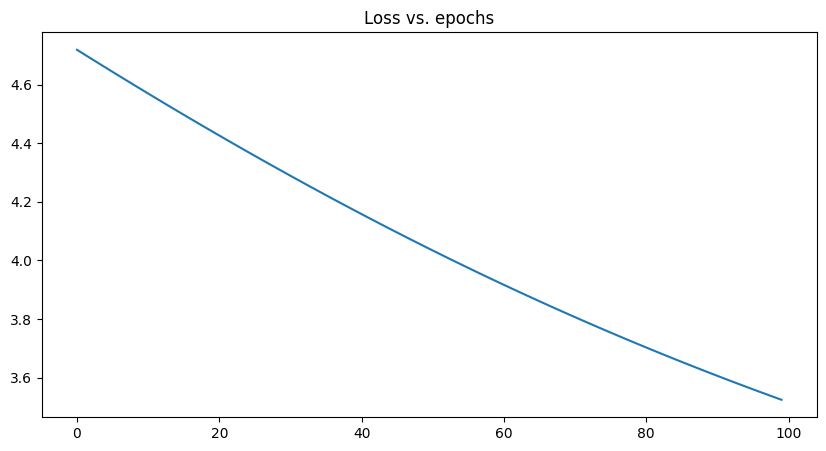

In [31]:
from torch.utils.data import DataLoader, TensorDataset

def train_bigram_batch(model, dataloader, x, y, num_epochs, loss_fn, optimizer, batch=True):
    losses = []

    for epoch in range(num_epochs):
        if batch:
            for x_batch, y_batch in dataloader:
                optimizer.zero_grad()
                y_pred = model(x_batch) 
                loss = loss_fn(y_pred, y_batch)
                loss.backward()
                optimizer.step()
                losses.append(loss.item())
        else:
            optimizer.zero_grad()
            y_pred = model(x) 
            loss = loss_fn(y_pred, y)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())


        if (epoch+1) % 10 == 0:
            print(f"Epoch: {epoch+1} | Loss: {loss.item()}")

    return model, losses

# use dataloader to make batching efficient
batch_size = 1024
dataset = TensorDataset(x, y)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=0)

model = Bigram(vocab_size)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
num_epochs = 100
do_batch = False
model, losses = train_bigram_batch(model, dataloader, x, y, \
                                   num_epochs, loss_fn, optimizer, do_batch)
plot_loss(losses)

Wow ... this batching strategy was really bad! It is much faster to just pass in the whole batch in one go!

Maybe I need to use the proper GPU on a MAC?

In [32]:
def train_bigram_manual_batch(model, x, y, num_epochs, loss_fn, optimizer, batch_size):
    # Reshape data into batches
    num_batches = len(x) // batch_size
    x_batched = x[:num_batches * batch_size].view(num_batches, batch_size)
    y_batched = y[:num_batches * batch_size].view(num_batches, batch_size)

    losses = []

    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for batch_idx in range(num_batches):
            # Extract the current batch
            x_batch = x_batched[batch_idx]
            y_batch = y_batched[batch_idx]

            # Forward pass
            optimizer.zero_grad()
            y_pred = model(x_batch)
            loss = loss_fn(y_pred, y_batch)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / num_batches
        losses.append(avg_loss)

        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Avg Loss: {avg_loss:.4f}")

    return model, losses

Using device: mps
Epoch: 0 | Avg Loss: 2.7737
Epoch: 10 | Avg Loss: 2.4522
Epoch: 20 | Avg Loss: 2.4522
Epoch: 30 | Avg Loss: 2.4522
Epoch: 40 | Avg Loss: 2.4522
Epoch: 50 | Avg Loss: 2.4522
Epoch: 60 | Avg Loss: 2.4522
Epoch: 70 | Avg Loss: 2.4522
Epoch: 80 | Avg Loss: 2.4522
Epoch: 90 | Avg Loss: 2.4522


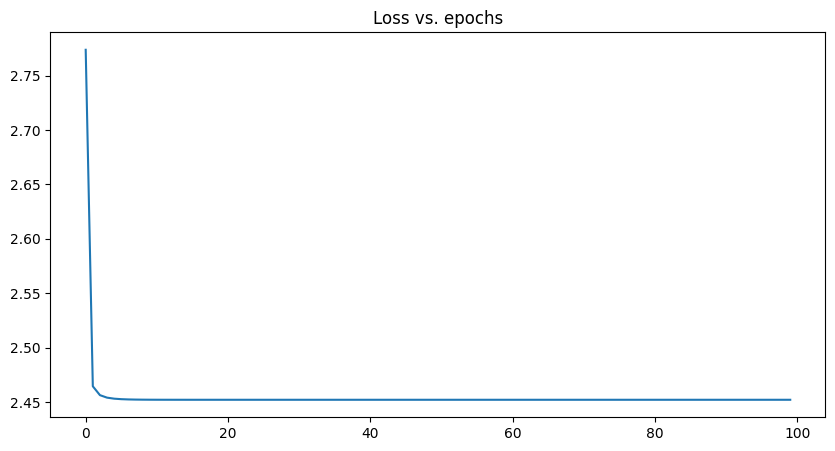

In [39]:
# Check for MPS support
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
print(f"Using device: {device}")

# use dataloader to make batching efficient
batch_size = 1024

model = Bigram(vocab_size)

# move the model and data the device
model = model.to(device)
x = x.to(device)
y = y.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
num_epochs = 100
model, losses = train_bigram_manual_batch(model, x, y, num_epochs, loss_fn, optimizer,\
                                          batch_size)
plot_loss(losses)

Yuk... this didn't work either. I think I am going to call it and stop here. This is probably why you need a proper ML guy to figure this out :-)